# 서울시 CCTV 현황 데이터 분석

In [20]:
import numpy as np
import pandas as pd

## 1. 서울통계서비스 사이트에서 ' 주민등록인구(구별) ' 통계에서 2018년도 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

## 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

In [21]:
pop = pd.read_csv('서울시 인구현황.txt', sep='\t', thousands=',',
                  usecols = [1, 3, 6, 9, 13],
                  names = ['자치구','인구수','내국인','외국인','고령자'],
                 skiprows=[0,1,2,3])

pop

,자치구,인구수,내국인,외국인,고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989
5,동대문구,362793,346156,16637,60367
6,중랑구,400678,395619,5059,66764
7,성북구,454532,442494,12038,72172
8,강북구,316750,312985,3765,61660
9,도봉구,333495,331238,2257,60023


## 3. 외국인 비율과 고령자 비율을 추가한다.

In [22]:
pop['외국인 비율'] = pop['외국인']/ pop['인구수'] * 100
pop['고령자 비율'] = pop['고령자']/ pop['인구수'] * 100

pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338


## 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서 '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

In [23]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


## 5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

In [24]:
cctv['기관명'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [25]:
cctv['기관명'] = [x.replace(' ', '') for x in cctv['기관명'].unique()]
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [26]:
cctv.rename(columns={'기관명' : '자치구'}, inplace=True)
cctv.head()         # inplace=True 원본 데이터를 고쳐라

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


## 6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고, 최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

In [27]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx', sep='\t', thousands=',')
cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [28]:
cctv[['2011년 이전', '2012년', '2013년']] = \
cctv[['2011년 이전', '2012년', '2013년']].fillna(0).astype(int)

cctv['기관명'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '중구', '중랑구']

# cctv['2011년 이전'] = cctv['2011년 이전'].fillna(0)astype(int)
# 이런 식으로 하나씩 해도 됨

cctv.rename(columns={'기관명' : '자치구'}, inplace=True)

cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671
5,광진구,1581,470,42,83,87,64,21,468,346
6,구로구,3227,852,219,349,187,268,326,540,486
7,금천구,1634,27,17,242,101,382,136,199,530
8,노원구,1906,481,117,203,80,461,298,110,156
9,도봉구,858,197,66,8,185,59,155,117,71


In [29]:
cctv1 = cctv.iloc[:, 2:7]
cctv1

,2011년 이전,2012년,2013년,2014년,2015년
0,1944,195,316,430,546
1,303,387,134,59,144
2,243,88,141,74,145
3,219,155,118,230,187
4,430,56,419,487,609
5,470,42,83,87,64
6,852,219,349,187,268
7,27,17,242,101,382
8,481,117,203,80,461
9,197,66,8,185,59


In [30]:
cctv1.sum(axis=1)

0     3431
1     1027
2      691
3      909
4     2001
5      746
6     1875
7      769
8     1342
9      515
10    1437
11     993
12    1009
13    1235
14    1840
15    1251
16    1687
17     974
18    1459
19    1042
20    1841
21    2070
22     941
23     629
24     872
dtype: int64

In [31]:
cctv['2015년 이전'] = cctv.iloc[:, 2:7].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강남구,5221,1944,195,316,430,546,765,577,448,3431
1,강동구,1879,303,387,134,59,144,194,273,385,1027
2,강북구,1265,243,88,141,74,145,254,1,319,691
3,강서구,1617,219,155,118,230,187,190,264,254,909
4,관악구,3985,430,56,419,487,609,619,694,671,2001


In [32]:
cctv['최근 3개년'] = cctv.iloc[:, 7:10].sum(axis=1)

cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852
2,강북구,1265,243,88,141,74,145,254,1,319,691,574
3,강서구,1617,219,155,118,230,187,190,264,254,909,708
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984


In [33]:
cctv['최근 증가율'] = cctv['최근 3개년']/ cctv['2015년 이전'] * 100

cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,52.171379
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,82.960078
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,83.068017
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,77.887789
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,99.150425


## 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [34]:
cctv.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년'], axis=1,
         inplace=True)
cctv.head()

,자치구,소계,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,765,577,448,3431,1790,52.171379
1,강동구,1879,194,273,385,1027,852,82.960078
2,강북구,1265,254,1,319,691,574,83.068017
3,강서구,1617,190,264,254,909,708,77.887789
4,관악구,3985,619,694,671,2001,1984,99.150425


In [35]:
del cctv['2016년']
del cctv['2017년']
del cctv['2018년']
del cctv['2015년 이전']
del cctv['최근 3개년']
del cctv['기관명']
cctv.head()

KeyError: '기관명'

## 8. 서울시 인구 데이터와 cctv 데이터를 합치고, '자치구'를 인덱스로 만든다.

In [36]:
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338


In [37]:
df = pd.merge(cctv, pop, on='자치구')
df.head()

,자치구,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [64]:
df.set_index('자치구', inplace=True)
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.009494,2570.380612
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.004111,503.708698
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.003994,712.934353
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.002714,1165.777237
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.007713,1430.274035


##자치구별 시시티비 갯수

In [38]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
mpl.rc('font', family = 'Malgun Gothic')
%matplotlib inline

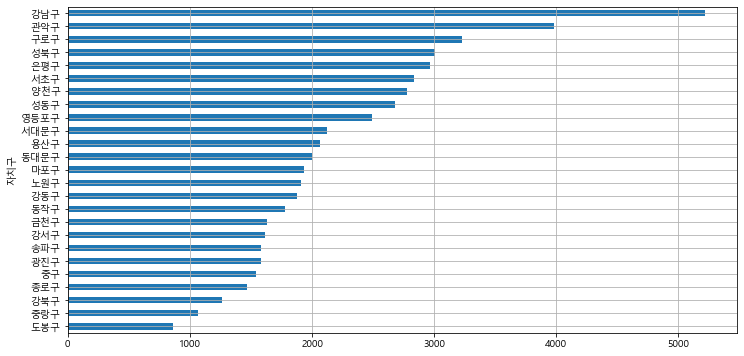

In [65]:
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

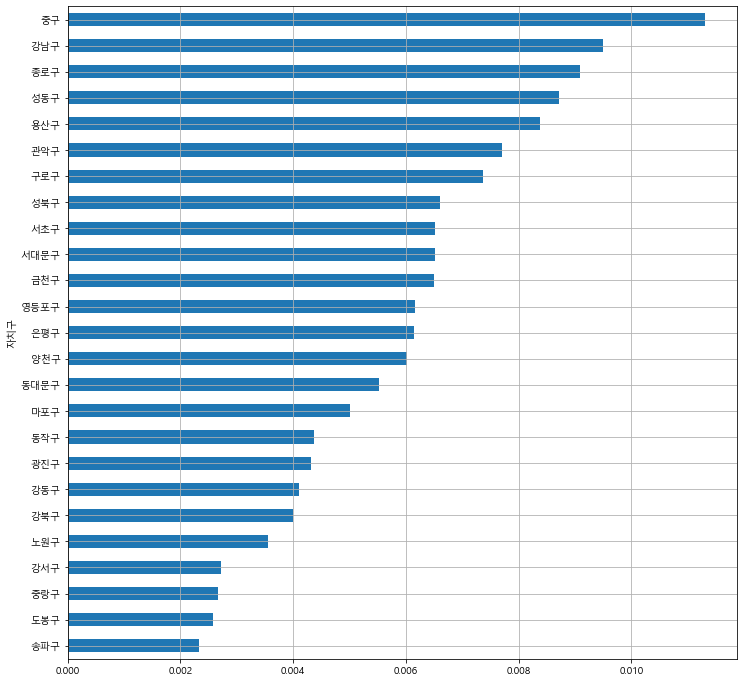

In [67]:
df['인당 CCTV'] = df['소계'] / df['인구수']
df['인당 CCTV'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

#### - 자치구별 최근 증가율 (내림차순으로)

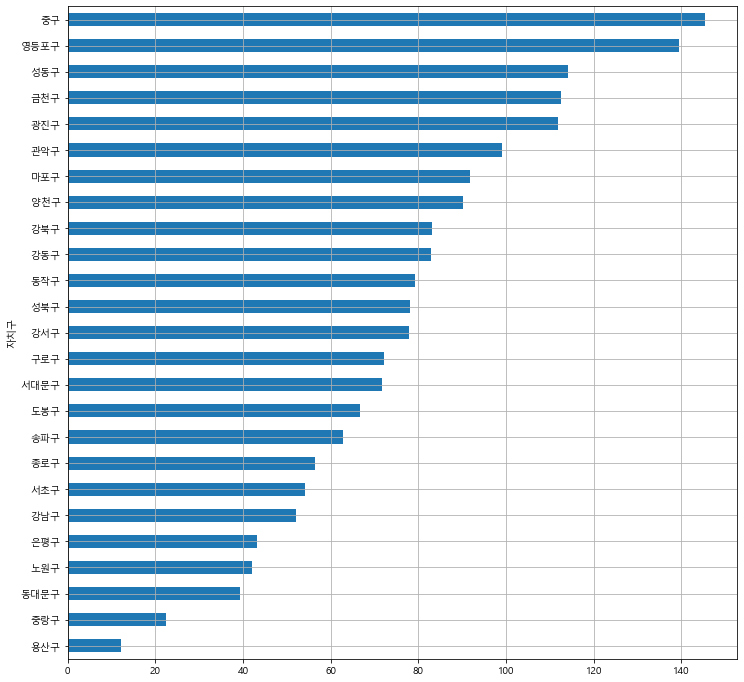

In [68]:
df['최근 증가율'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

#### - 인구수와 CCTV 댓수의 산점도

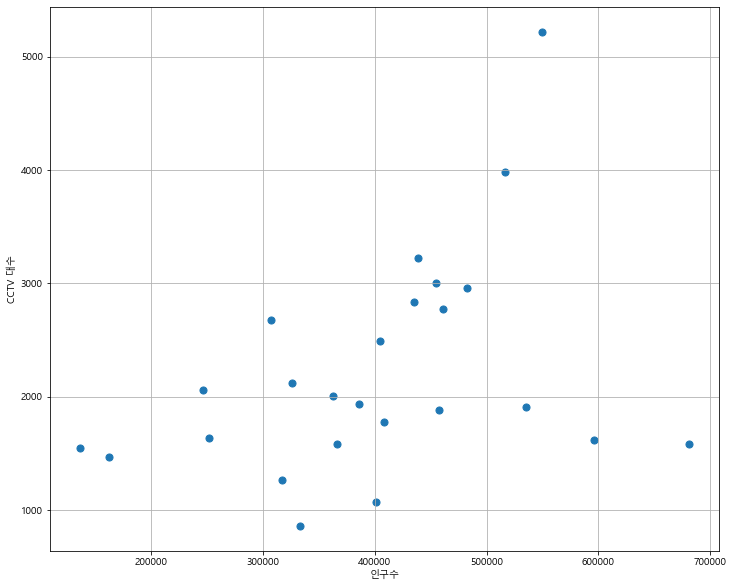

In [69]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()
plt.show()

#### - 인구수와 CCTV 댓수의 산점도 및 회귀선

In [70]:
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

In [71]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 101)


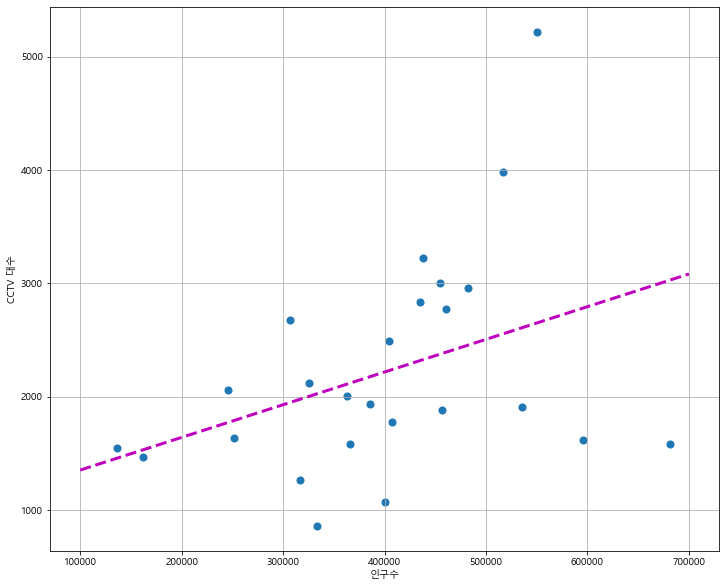

In [72]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m')
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()
plt.show()

#### - 인구수와 CCTV 댓수의 산점도, 회귀선 및 자치구명

In [73]:
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.009494,2570.380612
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.004111,503.708698
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.003994,712.934353
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.002714,1165.777237
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.007713,1430.274035


In [74]:
df['오차'] = np.abs(df['소계'] - f1(df['인구수']))
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.009494,2570.380612
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.004111,503.708698
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.003994,712.934353
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.002714,1165.777237
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.007713,1430.274035


In [75]:
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.009494,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.002329,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.007713,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.002573,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.002714,1165.777237
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.002665,1152.085731
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615,0.007362,898.343155
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,0.008721,728.639767
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.003994,712.934353


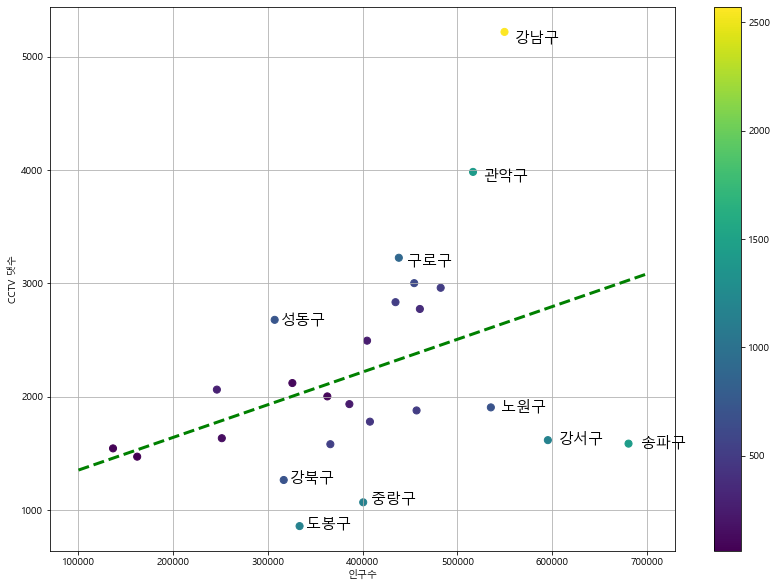

In [76]:
plt.figure(figsize=(14,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid()
plt.show()

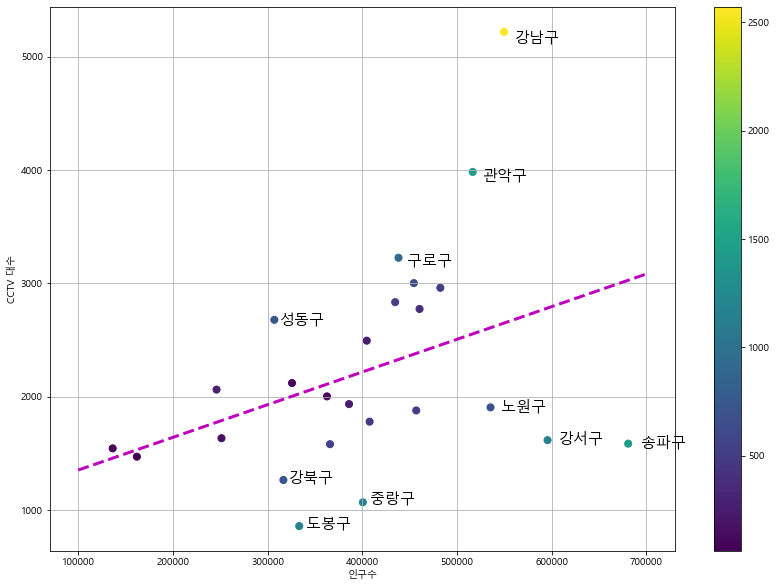

In [77]:
plt.figure(figsize=(14,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.colorbar()
plt.grid()
plt.show()

#### - 고령자 비율 vs 인당 CCTV

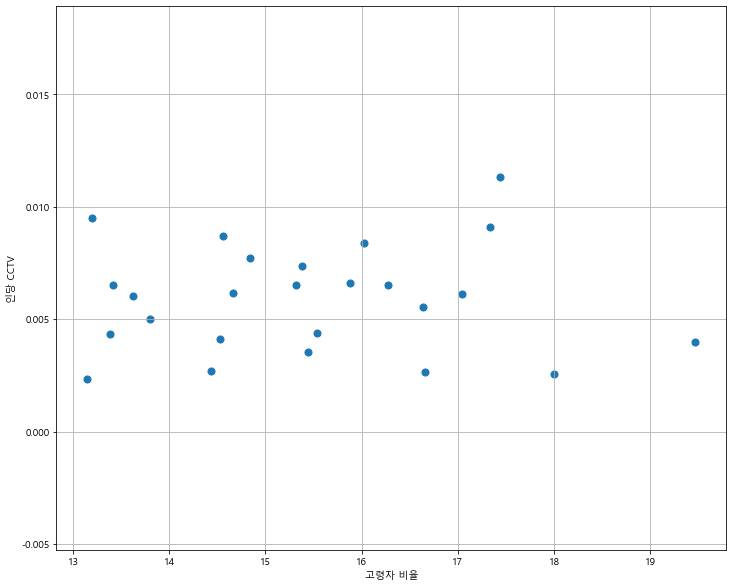

In [79]:
plt.figure(figsize=(12,10))
plt.scatter(df['고령자 비율'], df['인당 CCTV'], s=50)
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

In [80]:
fp2 = np.polyfit(df['고령자 비율'], df['인당 CCTV'], 1)
f2 = np.poly1d(fp2)
fx = np.linspace(13, 20, 101)

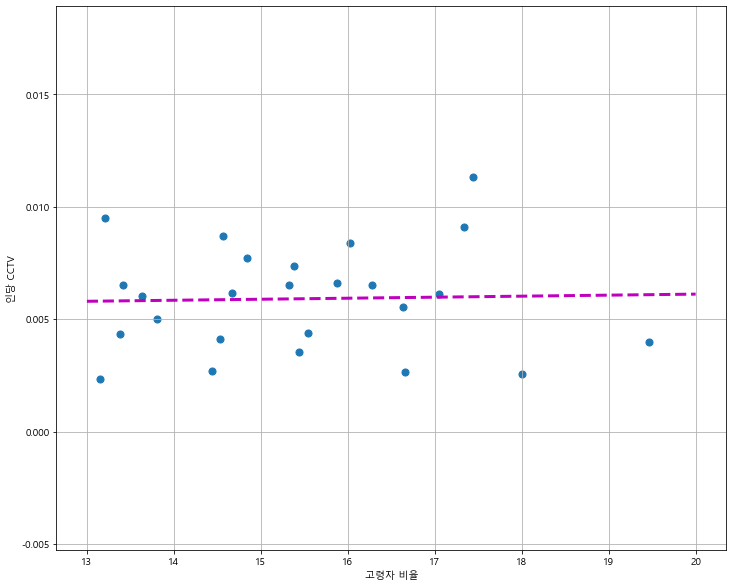

In [81]:
plt.figure(figsize=(12,10))
plt.scatter(df['고령자 비율'], df['인당 CCTV'], s=50)
plt.plot(fx, f2(fx), ls='dashed', lw=3, color='m')
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

#### - 외국인 비율 vs 인당 CCTV

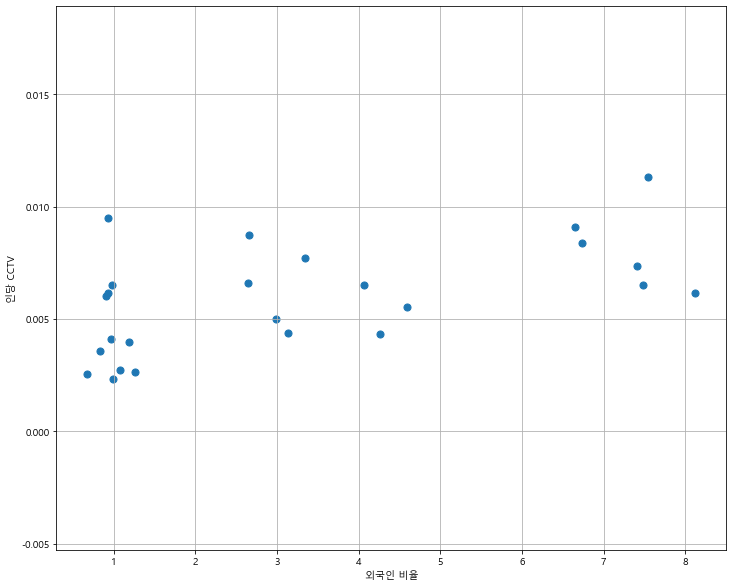

In [82]:

plt.figure(figsize=(12,10))
plt.scatter(df['외국인 비율'], df['인당 CCTV'], s=50)
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

In [83]:
fp3 = np.polyfit(df['외국인 비율'], df['인당 CCTV'], 1)
f3 = np.poly1d(fp3)
fx = np.linspace(0.5, 8.5, 101)

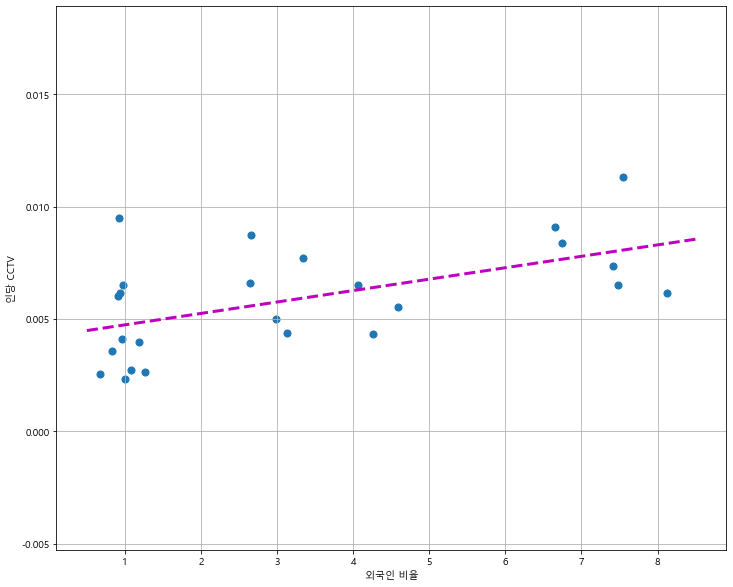

In [84]:
plt.figure(figsize=(12,10))
plt.scatter(df['외국인 비율'], df['인당 CCTV'], s=50)
plt.plot(fx, f3(fx), ls='dashed', lw=3, color='m')
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()